# Zoomcamp ML Capstone project
```

README.md with
Description of the problem
Instructions on how to run the project
Data
You should either commit the dataset you used or have clear instructions how to download the dataset
Notebook (suggested name - notebook.ipynb) with
Data preparation and data cleaning
EDA, feature importance analysis
Model selection process and parameter tuning
```

# Website phishing and scam prediction

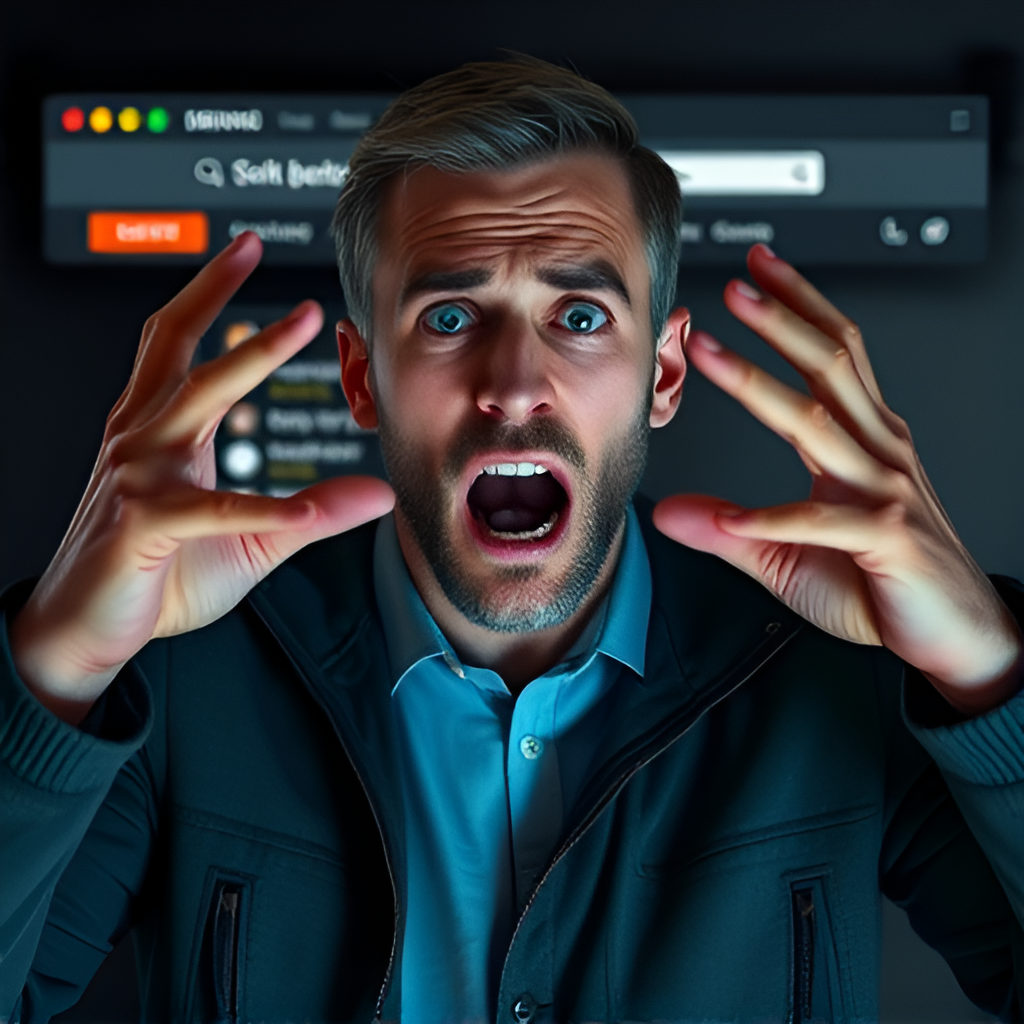

## 1. Description of the problem
```
Website phishing is a form of cyberattack where malicious actors create a fraudulent website that mimics a legitimate one. The goal is to deceive users into revealing sensitive information, such as:
Login credentials,Credit card details, Personal identification data (e.g., Social Security numbers), Account details for financial systems

These fake websites often closely resemble the appearance and URL of a trusted site, making it difficult for users to distinguish between the legitimate and malicious versions.

Techniques Used in Website Phishing
Spoofed URLs: Cybercriminals use URLs similar to legitimate websites (e.g., using "g00gle.com" instead of "google.com").
Email Phishing: Victims are lured through emails containing links to the phishing site.
Clone Websites: Replicas of legitimate websites with subtle differences.
SSL Certificates: Phishing sites might also use HTTPS to appear more authentic.
Pop-up Forms:Fake login or payment forms embedded in legitimate-looking sites.

How Website Phishing Affects Online Trading
Online trading platforms, such as stock brokerages, cryptocurrency exchanges, and e-commerce websites, are frequent targets of phishing attacks. The impact includes:
1. Loss of Sensitive Information
2. Theft of Funds
3. Compromised Reputation
4. Fraudulent Trades and Market Manipulation
5. Identity Theft
6. Loss of Business Opportunities


The goal is to use set collected features to predict phishing websites and avoid/minize losses.
```

## 1.1 Data source
```
https://archive.ics.uci.edu/dataset/327/phishing+websites
```

In [19]:
!pip install -q scipy

You should consider upgrading via the 'c:\users\ahmed\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [163]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.linear_model import LogisticRegression
from scipy.io import arff

from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    f1_score
)



# 2. Load data

In [2]:
# Load ARFF file
data, meta = arff.loadarff(r'..\data\Training Dataset.arff')

# Convert to Pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


## 2.1 Preprocessing-Convert the data types

In [3]:
# Decode all byte-string columns into int
for column in df.columns:
    if df[column].dtype == 'object':  # Byte strings are usually stored as 'object' dtype
        try:
            df[column] = df[column].str.decode('utf-8')  # Decode to regular strings
        except AttributeError:
            pass  # Column doesn't contain byte strings

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13  URL_of_Anchor                11

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registeration_length,favicon,...,popupwidnow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
#Change the result as type int
df['result'] = df['result'].astype(int)

# 3 Exploratory Data Analysis (EDA)

```
All features are encoded as follows:
| **Category**   | **Value** |
|----------------|-----------|
| Legitimate     | 1         |
| Suspicious     | 0         |
| Phishing       | -1        |

The results column is encoded as :
| **Category**   | **Value** |
|----------------|-----------|
| Legitimate     | 1         |
| Phishing       | -1        |

```

In [7]:
#all coloumns are 1 or -1
#print columns with more than two values
for col in df.columns:
    
    x = df[col].value_counts()
    if len(x) > 2:
        print(f'*** {col} **')
        print(x)

*** url_length **
url_length
-1    8960
1     1960
0      135
Name: count, dtype: int64
*** having_sub_domain **
having_sub_domain
1     4070
0     3622
-1    3363
Name: count, dtype: int64
*** sslfinal_state **
sslfinal_state
1     6331
-1    3557
0     1167
Name: count, dtype: int64
*** url_of_anchor **
url_of_anchor
0     5337
-1    3282
1     2436
Name: count, dtype: int64
*** links_in_tags **
links_in_tags
0     4449
-1    3956
1     2650
Name: count, dtype: int64
*** sfh **
sfh
-1    8440
1     1854
0      761
Name: count, dtype: int64
*** web_traffic **
web_traffic
1     5831
-1    2655
0     2569
Name: count, dtype: int64
*** links_pointing_to_page **
links_pointing_to_page
0     6156
1     4351
-1     548
Name: count, dtype: int64


In [8]:
#check for null or missing values
df.isnull().sum()

having_ip_address              0
url_length                     0
shortining_service             0
having_at_symbol               0
double_slash_redirecting       0
prefix_suffix                  0
having_sub_domain              0
sslfinal_state                 0
domain_registeration_length    0
favicon                        0
port                           0
https_token                    0
request_url                    0
url_of_anchor                  0
links_in_tags                  0
sfh                            0
submitting_to_email            0
abnormal_url                   0
redirect                       0
on_mouseover                   0
rightclick                     0
popupwidnow                    0
iframe                         0
age_of_domain                  0
dnsrecord                      0
web_traffic                    0
page_rank                      0
google_index                   0
links_pointing_to_page         0
statistical_report             0
result    

## 3.1 Features correlation and selection

EDA: Feature importance - mutual information (for categorical variables)
No categorical variables

#### Distribution of categorical columns

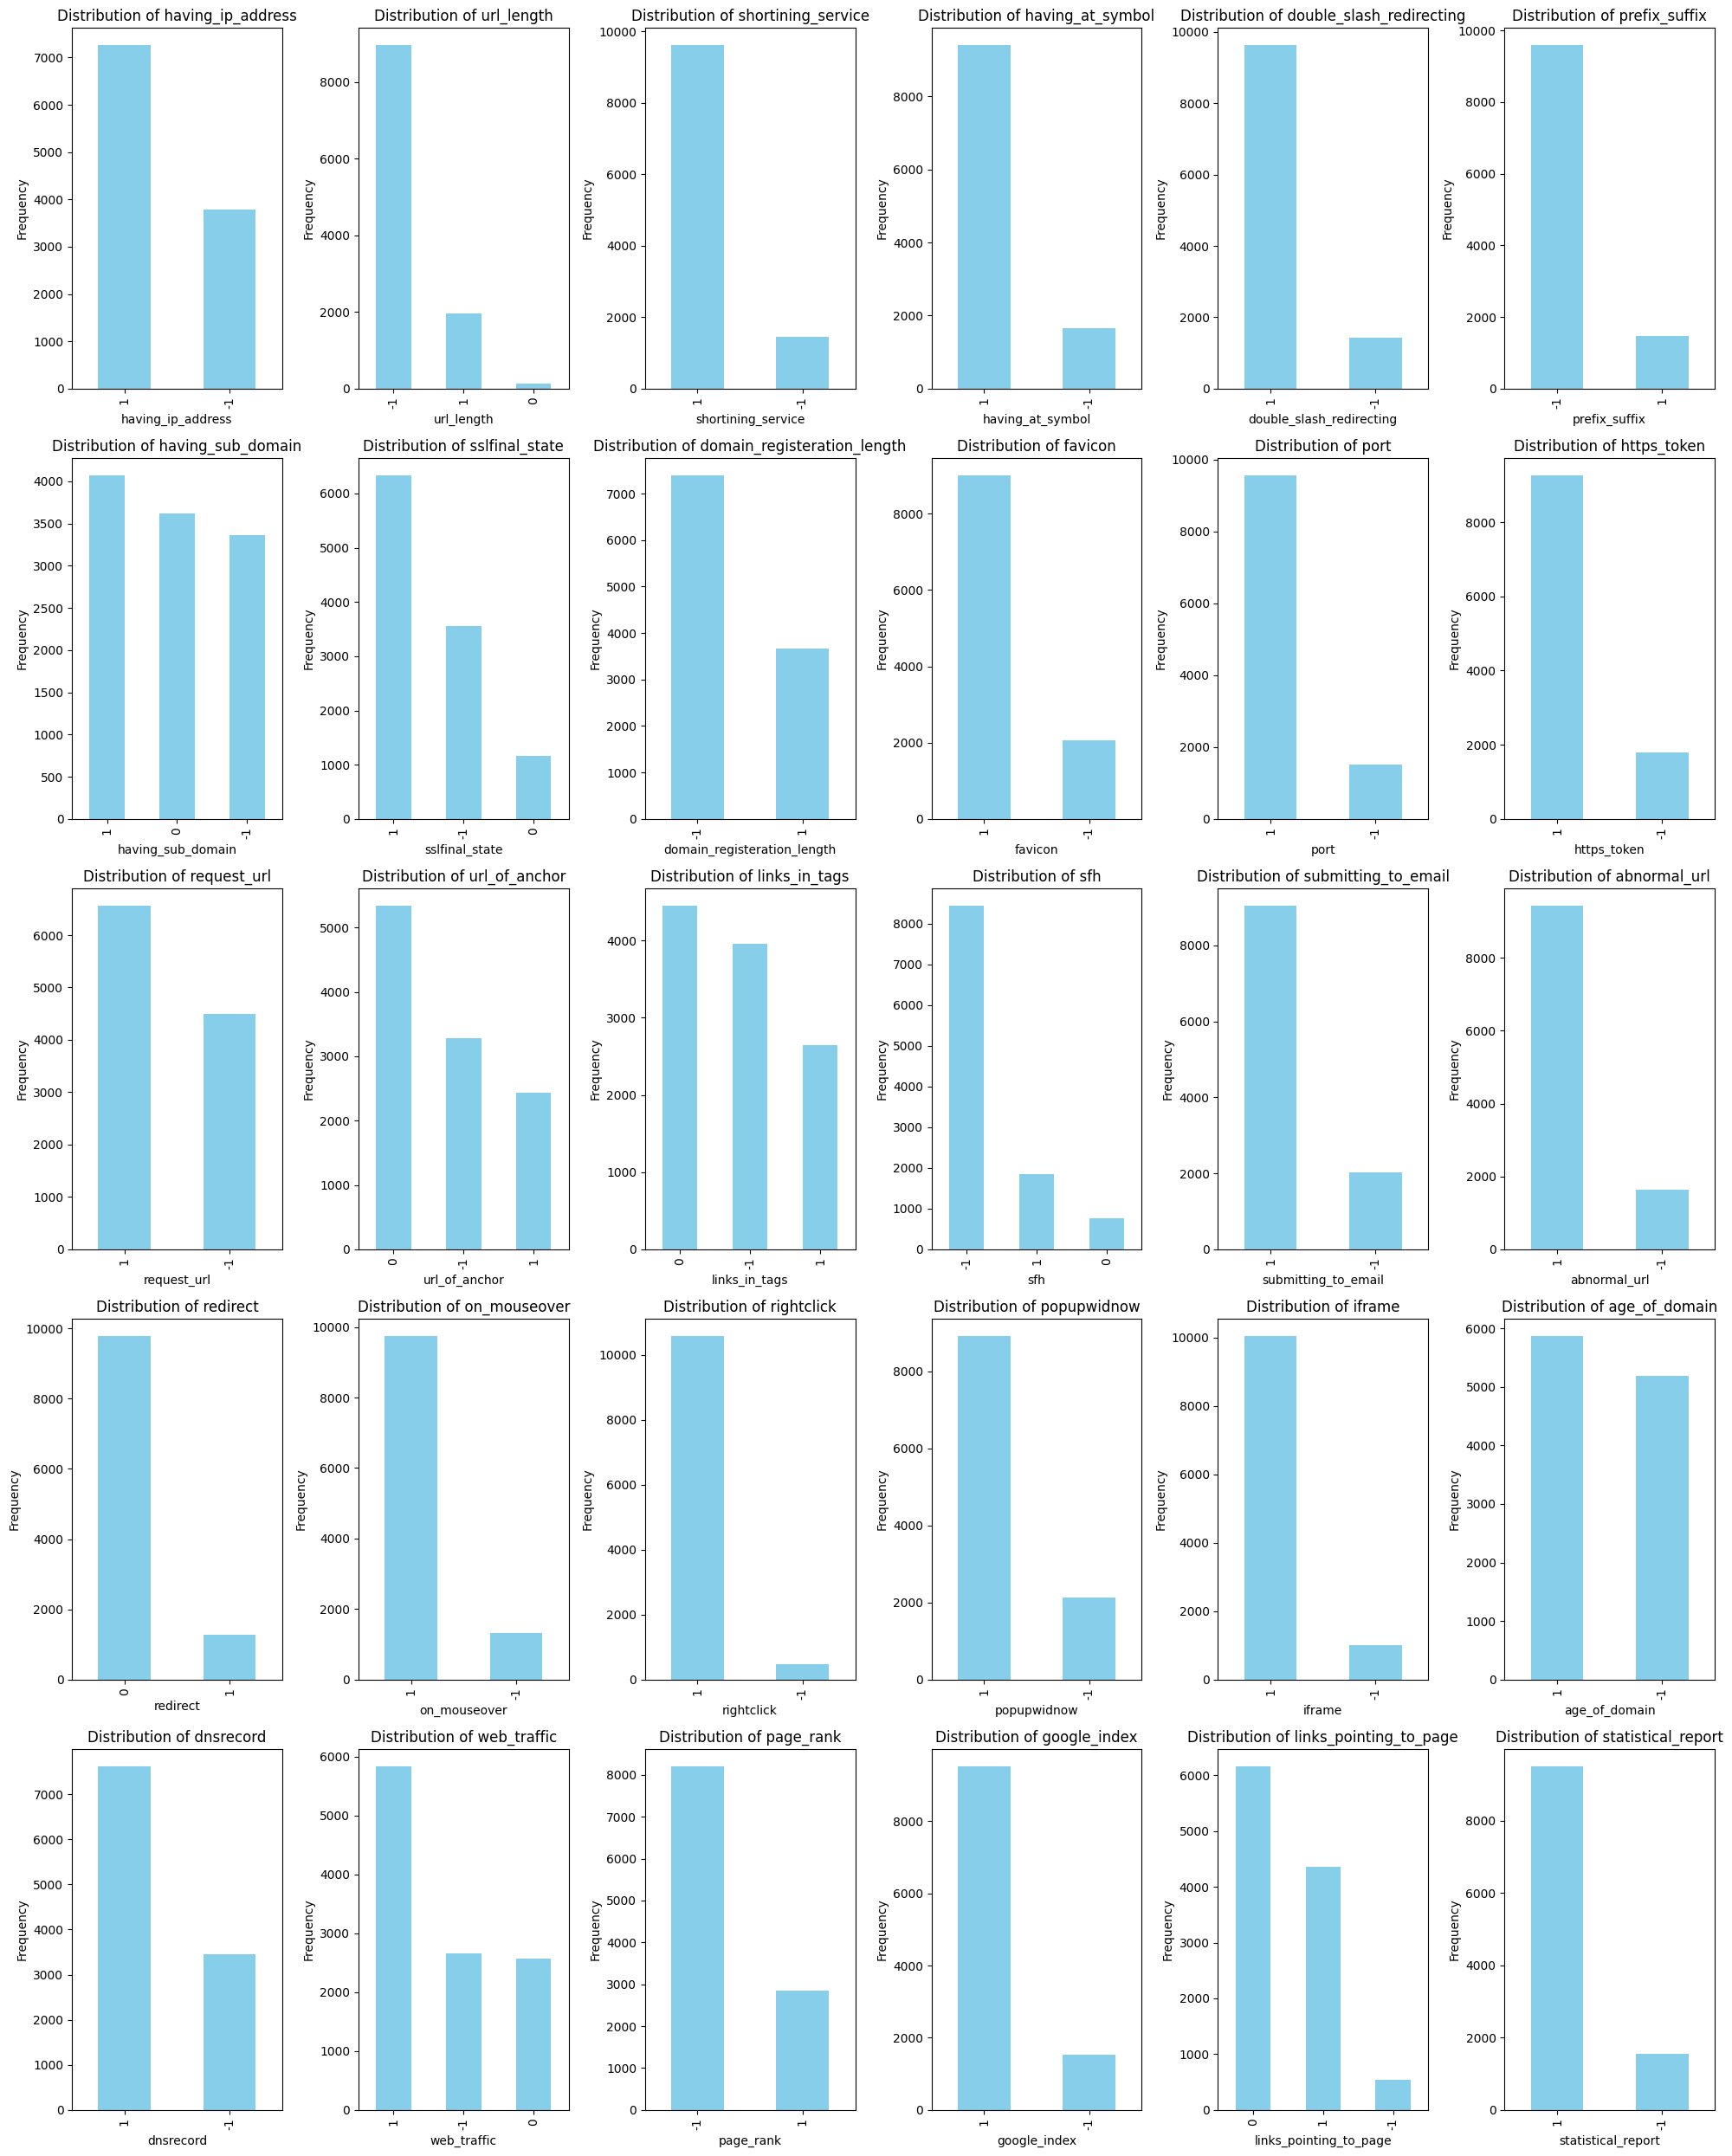

In [31]:
# Determine grid dimensions
plots_per_row = 6
num_plots = len(categorical)
num_rows = (num_plots + plots_per_row - 1) // plots_per_row  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes for easy indexing, if needed
axes = axes.flatten()

# Loop through each categorical column and create a bar plot
for i, column in enumerate(categorical):
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

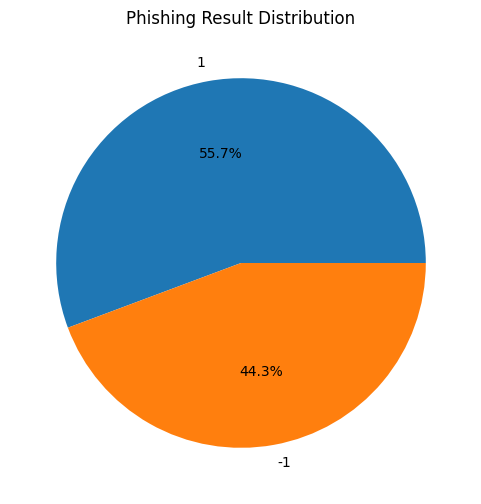

In [26]:
#Phising websites results distribution
Phising_results_counts = df['result'].value_counts(normalize=True)
Phising_results_counts.plot.pie(autopct="%.1f%%", figsize=(6, 6), title="Phishing Result Distribution")
plt.ylabel("")
plt.show()


<Figure size 1500x1300 with 0 Axes>

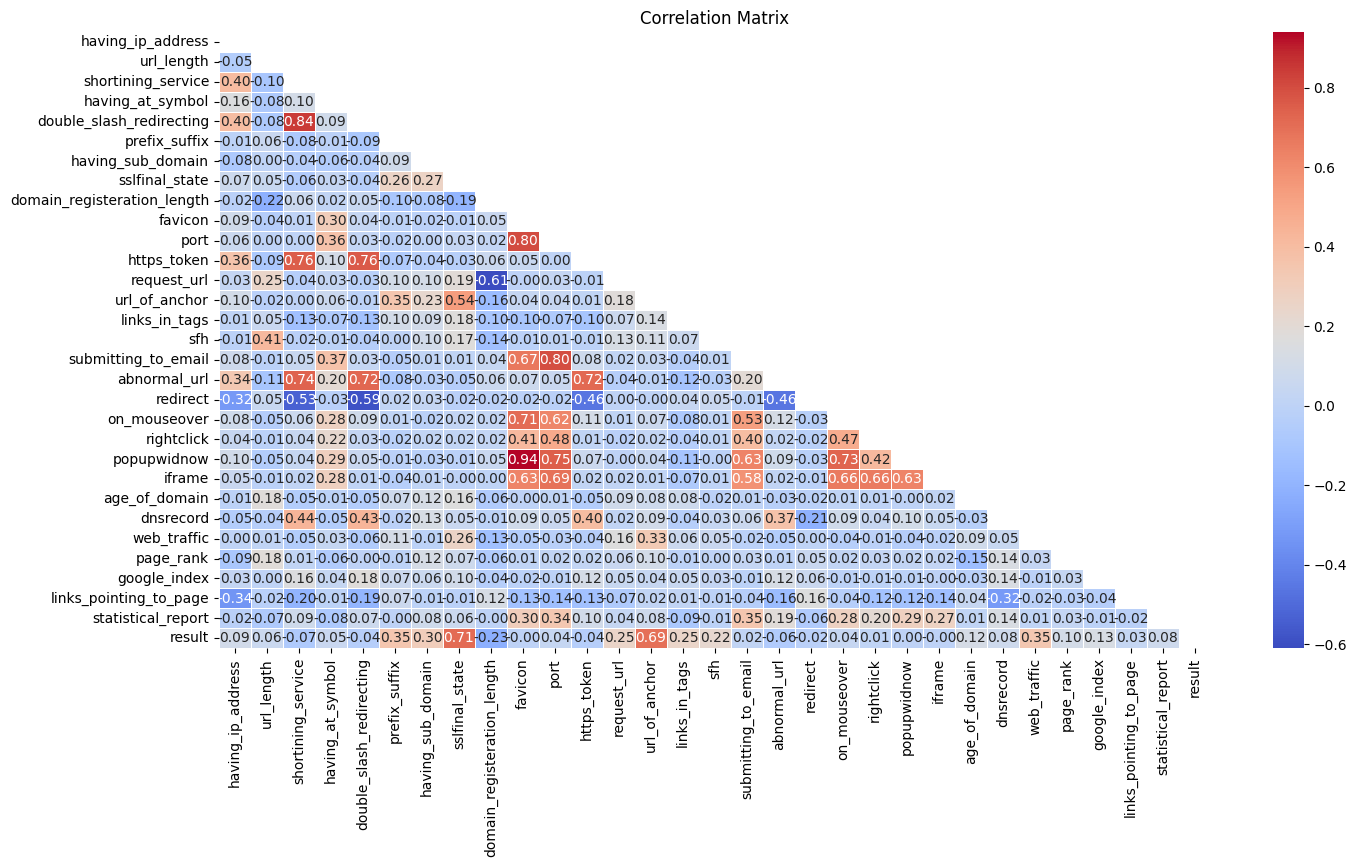

In [27]:
# Correlation Analysis
plt.figure(figsize=(15,13))
correlation_matrix = df.corr()
plt.figure(figsize=(16, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

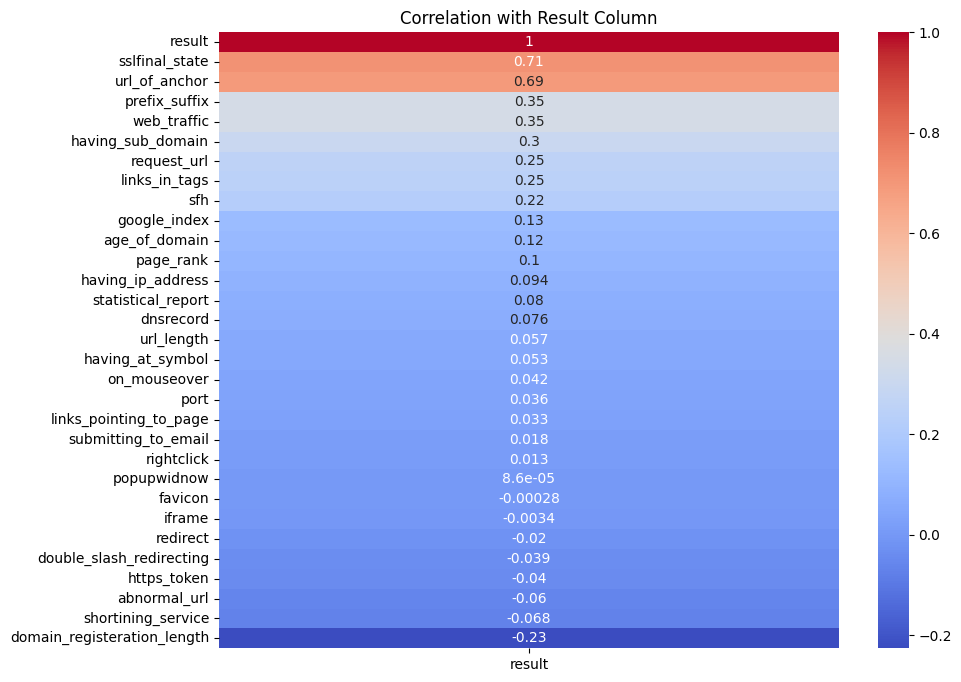

In [32]:
# Extract correlations with 'Result' and sort them
correlation_matrix = df.corr()
result_corr = correlation_matrix[['result']].sort_values(by='result', ascending=False)

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(result_corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation with Result Column')
plt.show()


In [33]:
# Get column names with correlation > 0
positive_corr_columns = result_corr[result_corr['result'] > 0].index.tolist()
print('Number of columns with positive correlation', len(positive_corr_columns) )
print('Positive correlation columns')
print(positive_corr_columns)

Number of columns with positive correlation 23
Positive correlation columns
['result', 'sslfinal_state', 'url_of_anchor', 'prefix_suffix', 'web_traffic', 'having_sub_domain', 'request_url', 'links_in_tags', 'sfh', 'google_index', 'age_of_domain', 'page_rank', 'having_ip_address', 'statistical_report', 'dnsrecord', 'url_length', 'having_at_symbol', 'on_mouseover', 'port', 'links_pointing_to_page', 'submitting_to_email', 'rightclick', 'popupwidnow']


## 3.2 Data split

In [34]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 11)

In [35]:
df_train = df_train.reset_index(drop = True)
df_val   = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_full_train = df_full_train.reset_index(drop = True)

In [38]:
y_train = df_train.result.values
y_val = df_val.result.values
y_test = df_test.result.values
y_full_train = df_full_train.result.values

In [39]:
del df_train['result']
del df_val['result']
del df_test['result']

In [40]:
X_train = df_train
X_val = df_val
X_test = df_test

In [41]:
df.shape, df_full_train.shape, df_test.shape, df_val.shape, df_train.shape

((11055, 31), (8844, 31), (2211, 30), (2211, 30), (6633, 30))

In [42]:
categorical = list(df_train.dtypes[df.dtypes == 'object'].index)
categorical

['having_ip_address',
 'url_length',
 'shortining_service',
 'having_at_symbol',
 'double_slash_redirecting',
 'prefix_suffix',
 'having_sub_domain',
 'sslfinal_state',
 'domain_registeration_length',
 'favicon',
 'port',
 'https_token',
 'request_url',
 'url_of_anchor',
 'links_in_tags',
 'sfh',
 'submitting_to_email',
 'abnormal_url',
 'redirect',
 'on_mouseover',
 'rightclick',
 'popupwidnow',
 'iframe',
 'age_of_domain',
 'dnsrecord',
 'web_traffic',
 'page_rank',
 'google_index',
 'links_pointing_to_page',
 'statistical_report']

In [43]:

numerical = list(df_train.dtypes[df.dtypes != 'object'].index)
numerical

[]

# 4 Model training, tuning, and selection

In [114]:
#Store accuracies
# Creating holders to store the model performance results
ML_name = []
models_acc_train = []
models_acc_val = []
models_acc_test = []

#function to call for storing the results
def storeResults(model, acu_tr,acu_val, acu_test):
  ML_name.append(model)
  models_acc_train.append(round(acu_tr, 4))
  models_acc_val.append(round(acu_val, 4))
  models_acc_test.append(round(acu_test, 4))

In [47]:
#create train dict for hot encoding
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict[0]

{'having_ip_address': '1',
 'url_length': '1',
 'shortining_service': '1',
 'having_at_symbol': '1',
 'double_slash_redirecting': '1',
 'prefix_suffix': '-1',
 'having_sub_domain': '1',
 'sslfinal_state': '1',
 'domain_registeration_length': '-1',
 'favicon': '-1',
 'port': '1',
 'https_token': '-1',
 'request_url': '1',
 'url_of_anchor': '0',
 'links_in_tags': '0',
 'sfh': '-1',
 'submitting_to_email': '1',
 'abnormal_url': '1',
 'redirect': '0',
 'on_mouseover': '-1',
 'rightclick': '1',
 'popupwidnow': '-1',
 'iframe': '1',
 'age_of_domain': '1',
 'dnsrecord': '1',
 'web_traffic': '1',
 'page_rank': '1',
 'google_index': '1',
 'links_pointing_to_page': '-1',
 'statistical_report': '1'}

In [58]:
#create train dict for hot encoding
val_dict = df_val[categorical + numerical].to_dict(orient='records')
test_dict = df_test[categorical + numerical].to_dict(orient='records')

In [52]:
def create_DictVectorizer(train_dict):
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    return dv

In [54]:
dv = create_DictVectorizer(train_dict)
dv

DictVectorizer(sparse=False)

In [56]:
#get feature names
dv.get_feature_names_out() 

array(['abnormal_url=-1', 'abnormal_url=1', 'age_of_domain=-1',
       'age_of_domain=1', 'dnsrecord=-1', 'dnsrecord=1',
       'domain_registeration_length=-1', 'domain_registeration_length=1',
       'double_slash_redirecting=-1', 'double_slash_redirecting=1',
       'favicon=-1', 'favicon=1', 'google_index=-1', 'google_index=1',
       'having_at_symbol=-1', 'having_at_symbol=1',
       'having_ip_address=-1', 'having_ip_address=1',
       'having_sub_domain=-1', 'having_sub_domain=0',
       'having_sub_domain=1', 'https_token=-1', 'https_token=1',
       'iframe=-1', 'iframe=1', 'links_in_tags=-1', 'links_in_tags=0',
       'links_in_tags=1', 'links_pointing_to_page=-1',
       'links_pointing_to_page=0', 'links_pointing_to_page=1',
       'on_mouseover=-1', 'on_mouseover=1', 'page_rank=-1', 'page_rank=1',
       'popupwidnow=-1', 'popupwidnow=1', 'port=-1', 'port=1',
       'prefix_suffix=-1', 'prefix_suffix=1', 'redirect=0', 'redirect=1',
       'request_url=-1', 'request_url=1'

In [77]:
X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

## 4.1 Logistic Regression

In [57]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [63]:
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)
print('prediction',y_pred )
# Step 2: Calculate the accuracy
from sklearn.metrics import accuracy_score

#y_pred = model.predict(X_val)
y_pred = model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_pred >= 0.5)

print(f"Accuracy: {round(accuracy,2)}")

prediction [ 1  1  1 ...  1 -1  1]
Accuracy: 0.53


### 4.1.1 Find least impacting feature

In [66]:
#accuracy from above
all_features = df_train.columns.tolist()
acc_diff = 0
feature_m = ''
original_accuracy = accuracy
print('original accuracy', accuracy)
result = {}
for feature in all_features:
    min_features = all_features.copy()
    min_features.remove(feature)
    df_train_m = df_train[min_features]
    X_train_m = dv.transform(df_train_m[min_features].to_dict(orient='records'))
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_m, y_train)

    df_val_m = df_val[min_features]
    X_val_m = dv.transform(df_val_m[min_features].to_dict(orient='records'))
    
    y_pred = model.predict_proba(X_val_m)[:, 1]

    accuracy_m = accuracy_score(y_val, y_pred >= 0.5)

    diff = np.round(original_accuracy - accuracy_m, 6)

    #print(f'Feature: {feature} , accuracy: {accuracy_m}, difference : {diff}' ) 

    result[feature] = {'accuracy':accuracy_m, 'difference':diff}


original accuracy 0.5251017639077341


In [67]:
diff_df = pd.DataFrame(result).T
diff_df = diff_df.sort_values(by='difference')
diff_df

,accuracy,difference
sfh,0.528720,-0.003618
having_ip_address,0.526911,-0.001809
links_in_tags,0.526911,-0.001809
prefix_suffix,0.526459,-0.001357
links_pointing_to_page,0.526459,-0.001357
having_sub_domain,0.526006,-0.000905
web_traffic,0.526006,-0.000905
favicon,0.526006,-0.000905
page_rank,0.526006,-0.000905
https_token,0.525554,-0.000452


In [68]:
#impact features where difference > 0
impact_features = diff_df[diff_df['difference'] > 0].index
impact_features

Index(['domain_registeration_length', 'google_index', 'submitting_to_email',
       'shortining_service', 'redirect', 'sslfinal_state', 'url_of_anchor'],
      dtype='object')

### 4.1.2 Regularized logistic regression

In [69]:
all_features = df_train.columns.tolist()

X_train_c =   dv.transform(df_train[all_features].to_dict(orient='records'))

X_val_c =  dv.transform(df_val[all_features].to_dict(orient='records'))

c_list = [0.01, 0.1, 1, 10, 100]
result ={}
for C in c_list:


    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train_c, y_train)

    y_pred = model.predict_proba(X_val_c)[:, 1]

    accuracy_m = accuracy_score(y_val, y_pred >= 0.5) 
   

    diff = np.round(original_accuracy - accuracy_m, 6)

    #print(f'Feature: {feature} , accuracy: {accuracy_m}, difference : {diff}' ) 

    result[C] = {'accuracy':accuracy_m, 'difference':diff}

In [70]:
diff_df = pd.DataFrame(result).T
diff_df = diff_df.sort_values(by='difference')
diff_df

,accuracy,difference
0.01,0.528720,-0.003618
0.10,0.527815,-0.002714
1.00,0.525102,0.000000
10.00,0.524649,0.000452
100.00,0.524649,0.000452


Resul train at C =  1

In [71]:
#use impact features to train the model and calculate accuracy
# impact_features
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
X_train_impacted =   dv.transform(df_train[impact_features].to_dict(orient='records'))
model.fit(X_train_impacted, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [73]:
X_val_impacted =   dv.transform(df_val[impact_features].to_dict(orient='records'))
X_test_impacted =   dv.transform(df_test[impact_features].to_dict(orient='records'))

y_pred = model.predict_proba(X_val_impacted)[:, 1]

accuracy = accuracy_score(y_val, y_pred >= 0.5)

print(f"Accuracy: {round(accuracy,2)}")

Accuracy: 0.52


In [115]:

y_pred = model.predict_proba(X_train_impacted)[:, 1]
acu_train = accuracy_score(y_train, y_pred >= 0.5)
y_pred = model.predict_proba(X_val_impacted)[:, 1]
acu_val = accuracy_score(y_val, y_pred >= 0.5)
y_pred = model.predict_proba(X_test_impacted)[:, 1]
acu_test = accuracy_score(y_test, y_pred >= 0.5)

storeResults('LogisticRegression', acu_train,acu_val, acu_test)


In [83]:
#Save the model
import pickle 

with open(r'..\models\spam_website_logistic_regression.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

## 4.2 Decision Tree

In [79]:

dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [80]:
y_pred = dt.predict_proba(X_train)[:, 1]
print('predict score using X_train', roc_auc_score(y_train, y_pred))

y_pred = dt.predict_proba(X_val)[:, 1]
print('predict score using X_val', roc_auc_score(y_val, y_pred))


predict score using X_train 0.9947843167274633
predict score using X_val 0.9841059712099427


In [88]:
len(dt.feature_importances_)

68

In [89]:
len(dv.get_feature_names_out())

68

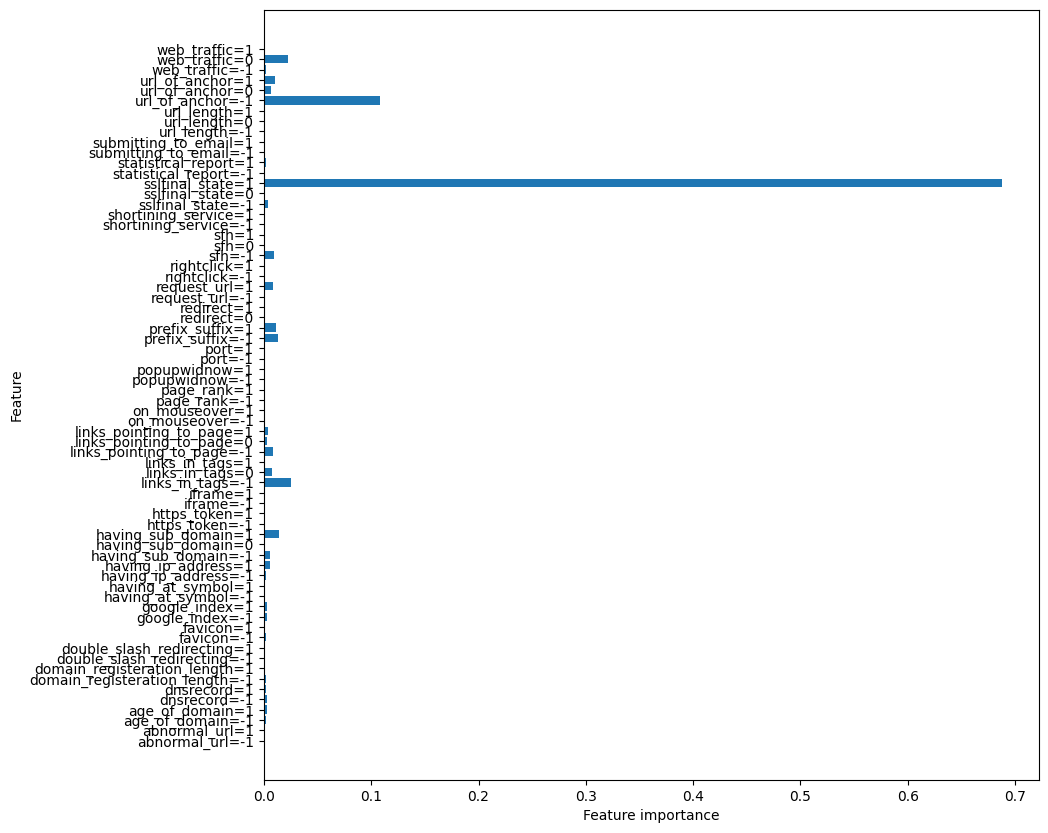

In [91]:

#checking the feature improtance in the model
#get columns from DV
dv_features = list(dv.get_feature_names_out())

plt.figure(figsize=(10,10))
n_features = len(dv_features)
plt.barh(range(n_features), dt.feature_importances_, align='center')
plt.yticks(np.arange(n_features), dv_features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [92]:
#Select best depth
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.880
   2 -> 0.933
   3 -> 0.963
   4 -> 0.975
   5 -> 0.979
   6 -> 0.985
  10 -> 0.984
  15 -> 0.977
  20 -> 0.973
None -> 0.976


In [93]:
scores = []

for depth in [4, 5, 6, 10]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [94]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.975333
1,4,5,0.975333
2,4,10,0.975424
3,4,15,0.974598
4,4,20,0.974113


In [95]:
df_scores['auc'] = round(df_scores['auc'],3)

In [96]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                     
max_depth            4      5      6      10
min_samples_leaf                            
1                 0.975  0.980  0.985  0.984
5                 0.975  0.979  0.985  0.986
10                0.975  0.980  0.985  0.988
15                0.975  0.979  0.984  0.990
20                0.974  0.978  0.983  0.989
100               0.973  0.975  0.979  0.979
200               0.963  0.965  0.964  0.964
500               0.960  0.960  0.960  0.960

In [97]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

In [116]:
y_pred = dt.predict_proba(X_train)[:, 1]
acu_train = roc_auc_score(y_train, y_pred )
y_pred = dt.predict_proba(X_val)[:, 1]
acu_val = roc_auc_score(y_val, y_pred )
y_pred = dt.predict_proba(X_test)[:, 1]
acu_test = roc_auc_score(y_test, y_pred )

storeResults('DecisionTreeClassifier', acu_train,acu_val, acu_test)

In [99]:
#Save the model
with open(r'..\models\spam_website_decision_tree.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

## 4.3 Random Forest Classifier

In [104]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,                            
                            random_state=1,
                            n_jobs=1)
rf.fit(X_train, y_train)

#y_pred = rf.predict_proba(X_val)[:, 1]
y_pred = rf.predict(X_val)

In [105]:
RMSE = np.sqrt(np.mean((y_pred - y_val) ** 2))
RMSE

np.float64(0.3780499369951718)

In [106]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [107]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

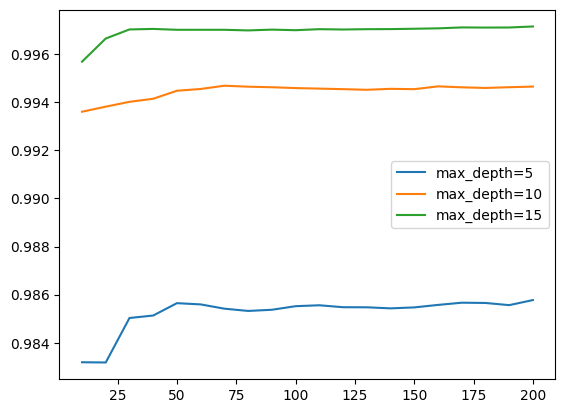

In [108]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [109]:
rf = RandomForestClassifier(n_estimators=25,
                                    max_depth=15,
                                    random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=25, random_state=1)

In [110]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

np.float64(0.996788801295718)

In [149]:
from sklearn.metrics import roc_curve

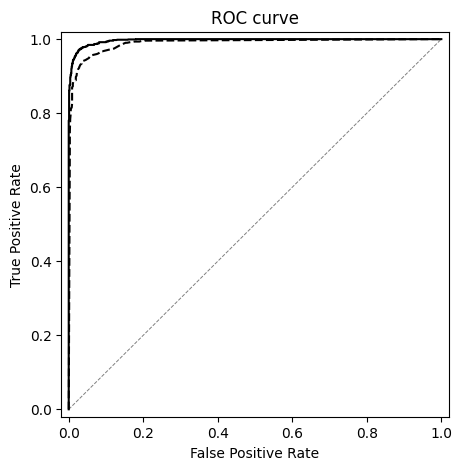

In [150]:
#rf
y_pred_rf = rf.predict_proba(X_val)[:, 1]
#deccision tree
y_pred_dt = dt.predict_proba(X_val)[:, 1]
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='black')

fpr, tpr, _ = roc_curve(y_val, y_pred_dt)
plt.plot(fpr, tpr, color='black', linestyle='dashed')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [117]:
y_pred = rf.predict_proba(X_train)[:, 1]
acu_train = roc_auc_score(y_train, y_pred )
y_pred = rf.predict_proba(X_val)[:, 1]
acu_val = roc_auc_score(y_val, y_pred )
y_pred = rf.predict_proba(X_test)[:, 1]
acu_test = roc_auc_score(y_test, y_pred )

storeResults('RandomForestClassifier', acu_train,acu_val, acu_test)

## 4.4 Model Comparison

In [118]:
results = pd.DataFrame({ 'ML Model': ML_name,    
    'Train Accuracy': models_acc_train,
    'Validation Accuracy': models_acc_val,
    'Test Accuracy': models_acc_test})
results


,ML Model,Train Accuracy,Validation Accuracy,Test Accuracy
0,LogisticRegression,0.5262,0.5197,0.5102
1,DecisionTreeClassifier,0.9925,0.9884,0.9843
2,RandomForestClassifier,0.9993,0.9968,0.9957


Selected model is RandomForestClassifier

rf = RandomForestClassifier(n_estimators=25,
                                    max_depth=15,
                                    random_state=1)

rf.fit(X_train, y_train)

## 4.5 Save Selected Model


In [119]:
rf = RandomForestClassifier(n_estimators=25,
                                    max_depth=15,
                                    random_state=1)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, n_estimators=25, random_state=1)

In [120]:
with open(r'..\models\spam_website.bin', 'wb') as f_out:
    pickle.dump((dv, rf), f_out)


### 4.5.1 Checked the saved Model

In [121]:
def predict_single(spam_site, dv, model):
    X = dv.transform([spam_site])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [122]:

with open('..\models\spam_website.bin', 'rb') as f_in:
    dv, model_p = pickle.load(f_in)

In [126]:
def load_model(model_path):
    with open(model_path, 'rb') as f_in:
        dv, model_p = pickle.load(f_in)
    return dv, model_p

dv_p, model_p = load_model(r'..\models\spam_website.bin')

In [141]:
#Is site ligitimate
def is_legitimate(prediction):
    if prediction >= 0.5:
        return True
    return False

In [147]:
test_index = 0
site = df_test.iloc[test_index].to_dict()
pred = predict_single(site, dv_p, model_p)

print('model calsses: ', model_p.classes_)
print('Legitimate prediction', pred)
print('Is legitimate: ', is_legitimate(pred))
print('y test value:', y_test[0])


model calsses:  [-1  1]
Legitimate prediction 0.04
Is legitimate:  False
y test value: -1


In [148]:
site = df_test.iloc[0].to_dict()
X = dv_p.transform([site])
y_pred = model_p.predict_proba(X)[:, 1]
print('Class value using model.predict', model_p.predict(X) )
y_pred

Class value using model.predict [-1]


array([0.04])

In [167]:
site

{'having_ip_address': '-1',
 'url_length': '-1',
 'shortining_service': '1',
 'having_at_symbol': '1',
 'double_slash_redirecting': '1',
 'prefix_suffix': '-1',
 'having_sub_domain': '1',
 'sslfinal_state': '-1',
 'domain_registeration_length': '1',
 'favicon': '1',
 'port': '1',
 'https_token': '1',
 'request_url': '-1',
 'url_of_anchor': '-1',
 'links_in_tags': '0',
 'sfh': '1',
 'submitting_to_email': '1',
 'abnormal_url': '1',
 'redirect': '0',
 'on_mouseover': '1',
 'rightclick': '1',
 'popupwidnow': '1',
 'iframe': '1',
 'age_of_domain': '-1',
 'dnsrecord': '1',
 'web_traffic': '-1',
 'page_rank': '-1',
 'google_index': '1',
 'links_pointing_to_page': '1',
 'statistical_report': '1'}

========================================

In [168]:
len(site.keys())

30